<a href="https://colab.research.google.com/github/A1r33s-thewarman/Analyse-how-Fossil-fuel-impact-for-global-climate-change/blob/main/Analyse%20how%20Fossil%20fuel%20impact%20for%20%20global%20climate%20change.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [3]:
fosil_en = pd.read_csv("global-fossil-fuel-consumption.csv")
fosil_en.tail()

,Entity,Code,Year,Coal (TWh; direct energy),Oil (TWh; direct energy),Gas (TWh; direct energy)
67,World,OWID_WRL,2015,43844,50892,34781
68,World,OWID_WRL,2016,43196,51920,35589
69,World,OWID_WRL,2017,43360,52568,36586
70,World,OWID_WRL,2018,44109,53181,38517
71,World,OWID_WRL,2019,43849,53620,39292


In [6]:
fosil_en.describe()

,Year,Coal (TWh; direct energy),Oil (TWh; direct energy),Gas (TWh; direct energy)
count,72.000000,72.000000,72.000000,72.000000
mean,1965.555556,22588.555556,30025.527778,16049.444444
std,55.355163,13253.929402,17895.744924,11796.334029
min,1800.000000,97.000000,0.000000,0.000000
25%,1965.750000,16120.250000,19149.250000,6727.500000
50%,1983.500000,22522.500000,35357.000000,15303.000000
75%,2001.250000,28126.000000,43368.250000,24511.500000
max,2019.000000,44993.000000,53620.000000,39292.000000


In [11]:
fosil_en2 = fosil_en[fosil_en["Year"] > 1969]

In [12]:
fosil_en2.head()

,Entity,Code,Year,Coal (TWh; direct energy),Oil (TWh; direct energy),Gas (TWh; direct energy)
22,World,OWID_WRL,1970,17059,26708,9614
23,World,OWID_WRL,1971,16966,28205,10292
24,World,OWID_WRL,1972,17154,30378,10861
25,World,OWID_WRL,1973,17668,32746,11378
26,World,OWID_WRL,1974,17682,32272,11656


In [19]:
del fosil_en2['Entity']
fosil_en2.head()

,Year,Coal (TWh; direct energy),Oil (TWh; direct energy),Gas (TWh; direct energy)
22,1970,17059,26708,9614
23,1971,16966,28205,10292
24,1972,17154,30378,10861
25,1973,17668,32746,11378
26,1974,17682,32272,11656


In [22]:
fosil_en2 = fosil_en2.rename(columns={'Coal (TWh; direct energy)': 'coal', 'Oil (TWh; direct energy)': 'Oil', 'Gas (TWh; direct energy)' : 'Gas'})

In [23]:
fosil_en2.head()

,Year,coal,Oil,Gas
22,1970,17059,26708,9614
23,1971,16966,28205,10292
24,1972,17154,30378,10861
25,1973,17668,32746,11378
26,1974,17682,32272,11656


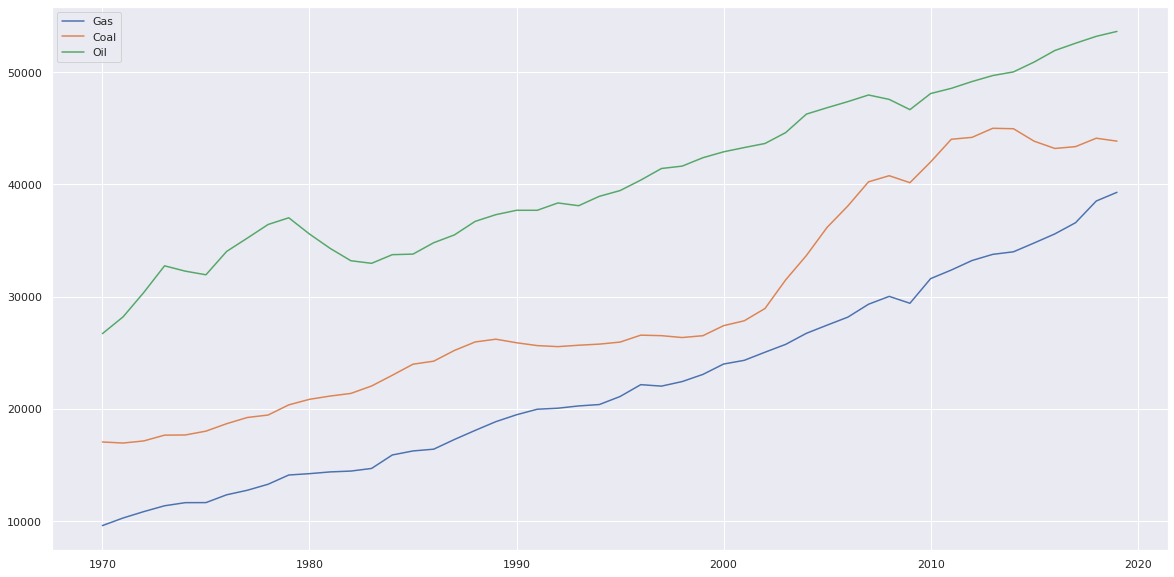

In [47]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
plt.figure(figsize=(20, 10))
plt.plot(fosil_en2['Year'], fosil_en2['Gas'], label = "Gas")
plt.plot(fosil_en2['Year'], fosil_en2['coal'], label = "Coal")
plt.plot(fosil_en2['Year'], fosil_en2['Oil'], label = "Oil")
plt.legend()
plt.show()

In [69]:
# apply the z-score method in Pandas using the .mean() and .std() methods
def z_score(df):
    # copy the dataframe
    df_std = df.copy()
    # apply the z-score method
    
    df_std['Gas'] = (df_std['Gas'] - df_std['Gas'].mean()) / df_std['Gas'].std()
    df_std['coal'] = (df_std['coal'] - df_std['coal'].mean()) / df_std['coal'].std()
    df_std['Oil'] = (df_std['Oil'] - df_std['Oil'].mean()) / df_std['Oil'].std()
        
    return df_std
    
# call the z_score function
fosil_norm = z_score(fosil_en2)

fosil_norm

,Year,coal,Oil,Gas
22,1970,-1.285211,-1.948589,-1.490184
23,1971,-1.295054,-1.739676,-1.409860
24,1972,-1.275157,-1.436423,-1.342450
25,1973,-1.220756,-1.105958,-1.281201
26,1974,-1.219274,-1.172107,-1.248266
27,1975,-1.182972,-1.217322,-1.247673
28,1976,-1.112801,-0.926769,-1.165336
29,1977,-1.054273,-0.761397,-1.117355
30,1978,-1.031306,-0.592396,-1.054210
31,1979,-0.935417,-0.508942,-0.956471


In [50]:
temp = pd.read_csv("https://pkgstore.datahub.io/core/global-temp/annual_csv/data/a26b154688b061cdd04f1df36e4408be/annual_csv.csv")
temp.tail()

,Source,Year,Mean
269,GISTEMP,1882,-0.1000
270,GCAG,1881,-0.0628
271,GISTEMP,1881,-0.1200
272,GCAG,1880,-0.1148
273,GISTEMP,1880,-0.2000


In [59]:
temp2 = temp[temp["Year"] > 1969]
temp3 = temp2[temp2["Source"] == 'GISTEMP']
temp3.sort_values(by=['Year'], inplace=True)
temp3.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Source,Year,Mean
93,GISTEMP,1970,0.02
91,GISTEMP,1971,-0.09
89,GISTEMP,1972,0.01
87,GISTEMP,1973,0.15
85,GISTEMP,1974,-0.07


In [60]:
temp4 = temp2[temp2["Source"] == 'GCAG']
temp4.sort_values(by=['Year'], inplace=True)
temp4.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Source,Year,Mean
8,GCAG,2012,0.6240
6,GCAG,2013,0.6679
4,GCAG,2014,0.7408
2,GCAG,2015,0.8998
0,GCAG,2016,0.9363


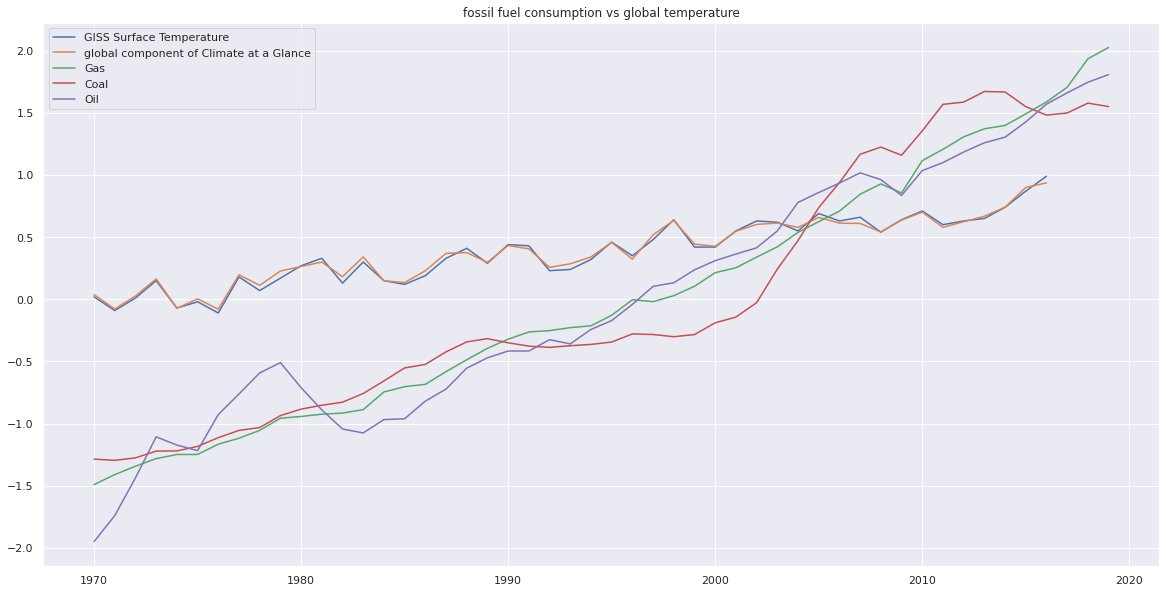

In [81]:
plt.figure(figsize=(20, 10))
plt.plot(temp3['Year'], temp3['Mean'], label = "GISS Surface Temperature")
plt.plot(temp4['Year'], temp4['Mean'], label = "global component of Climate at a Glance")
plt.plot(fosil_norm['Year'], fosil_norm['Gas'], label = "Gas")
plt.plot(fosil_norm['Year'], fosil_norm['coal'], label = "Coal")

plt.plot(fosil_norm['Year'], fosil_norm['Oil'], label = "Oil")
plt.title("fossil fuel consumption vs global temperature")

plt.legend()
plt.show()

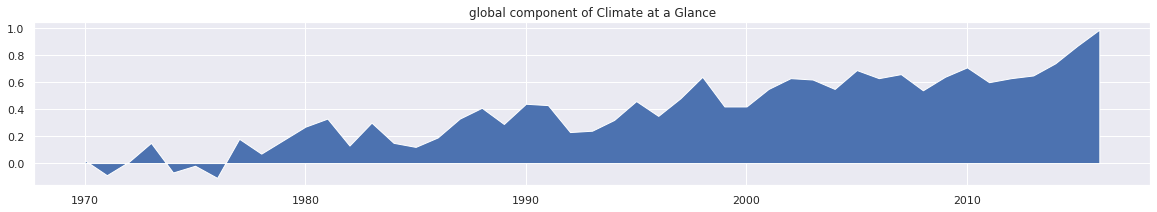

In [85]:
plt.title("global component of Climate at a Glance")
plt.fill_between(temp3['Year'], temp3['Mean'])
plt.show()